**Importación de librerías necesarias**

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import datasets, metrics
import pydot
from IPython.display import Image
from sklearn import tree
from io import StringIO
from joblib import dump, load

**Preproceso**

Montar drive para la carga de datos

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importación de los datos del dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/heart.csv")

Mostrar las primeras y últimas filas del dataframe importado


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Tipos de datos del df

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Mostrar un mapa de calor que indique la correlación entre vriables

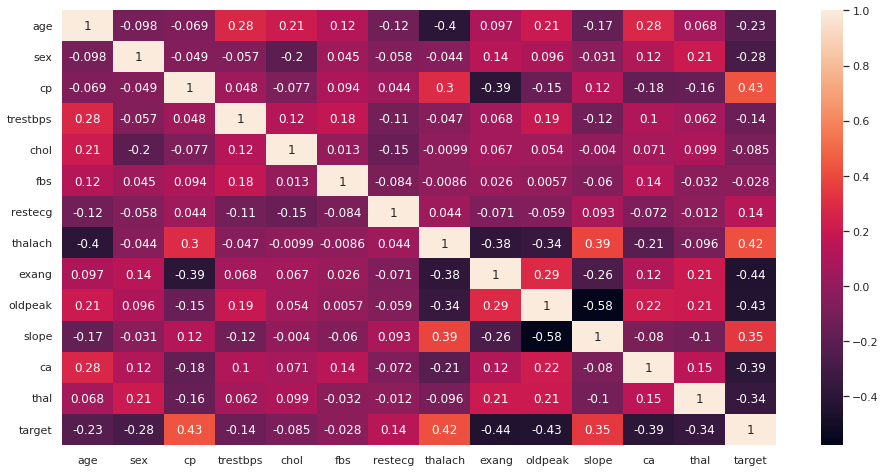

In [ ]:
sns.set()

# para definir el tamaño de cada dato
plt.figure(figsize=(16, 8))

sns.heatmap(df.corr(),annot = True)

Seleccionar las características a tener en cuenta en el estudio

In [ ]:
# campos : por ahora sin filtar

# df_filtrado  = pd.DataFrame()
# df_filtrado = df[[]].copy()

# df_filtrado


Separar datos entre datos de entrada y etiquetas (resultados)

In [ ]:
x_heart = df.drop('target',axis = 1)
y_heart = df['target']

Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test),  separacion train y test

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_heart,y_heart,
                                                 test_size = 0.2,
                                                 train_size = 0.8)



---


**AQUI COMIENZA LO DE ARBOLES**

---



**Entrenamiento y predicción**

Elegir, instanciar (eligiendo unos valores concretos, por ejemplo profundidad del árbol 3) y entrenar el modelo

In [ ]:
# instanciacion
arbol = DecisionTreeClassifier(criterion = 'gini',max_depth=3)

In [ ]:
# entrenamiento
arbol.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

Realizar una predicción con los datos de prueba

In [ ]:
# prediccion
y_predict = arbol.predict(x_test)

Mostrar el árbol de decisión resultante

In [ ]:
tree.export_graphviz(arbol)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[2] <= 0.5\\ngini = 0.499\\nsamples = 242\\nvalue = [116, 126]"] ;\n1 [label="X[11] <= 0.5\\ngini = 0.381\\nsamples = 117\\nvalue = [87, 30]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[7] <= 147.0\\ngini = 0.498\\nsamples = 51\\nvalue = [24, 27]"] ;\n1 -> 2 ;\n3 [label="gini = 0.403\\nsamples = 25\\nvalue = [18, 7]"] ;\n2 -> 3 ;\n4 [label="gini = 0.355\\nsamples = 26\\nvalue = [6, 20]"] ;\n2 -> 4 ;\n5 [label="X[3] <= 109.0\\ngini = 0.087\\nsamples = 66\\nvalue = [63, 3]"] ;\n1 -> 5 ;\n6 [label="gini = 0.5\\nsamples = 4\\nvalue = [2, 2]"] ;\n5 -> 6 ;\n7 [label="gini = 0.032\\nsamples = 62\\nvalue = [61, 1]"] ;\n5 -> 7 ;\n8 [label="X[12] <= 2.5\\ngini = 0.356\\nsamples = 125\\nvalue = [29, 96]"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="X[0] <= 55.5\\ngini = 0.251\\nsamples = 95\\nvalue = [14, 81]"] ;\n8 -> 9 ;\n10 [l

Mostrar la importancia de cada atributo en el árbol resultante

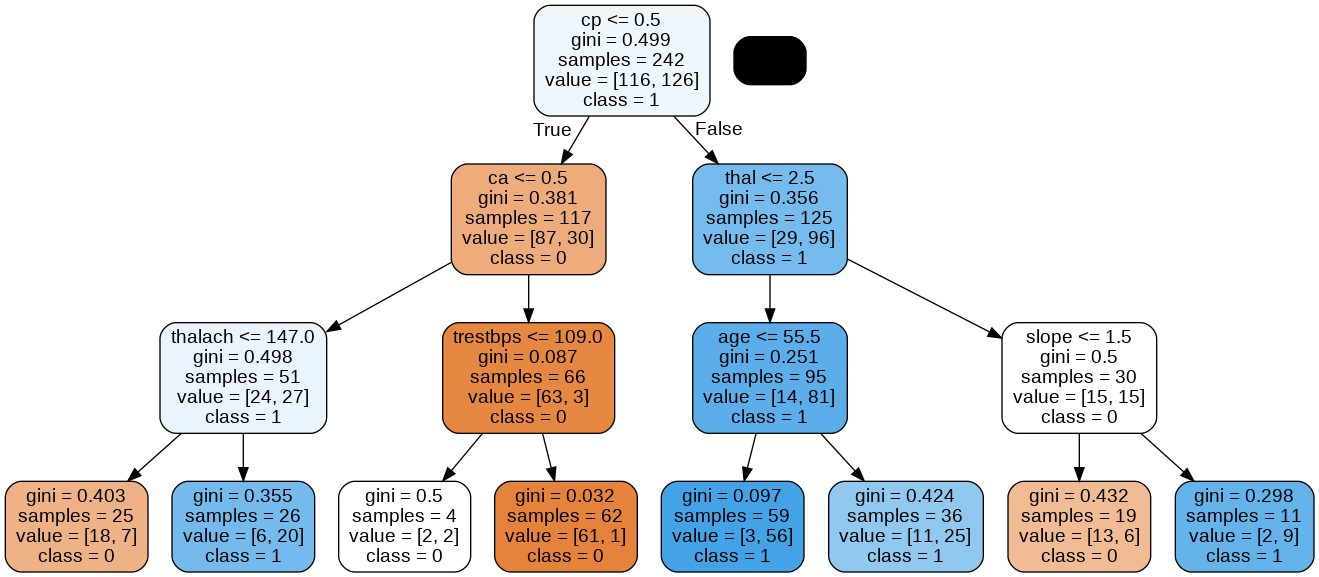

In [ ]:
from pandas._libs.tslibs import dtypes
dot_data = StringIO()


arbol_classes = []
# arbol_classes
for i in arbol.classes_:
  i = str(i)
  arbol_classes.append(i)

tree.export_graphviz(arbol, out_file = dot_data, class_names= arbol_classes, feature_names = x_train.columns,
                     rounded=True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())


Intenta guardar el modelo de predicción ya entrenado usando dump (https://scikitlearn.org/stable/modules/model_persistence.html)

In [ ]:
dump(arbol, 'arbol.joblib')

['arbol.joblib']

In [ ]:
arbol2 = load('arbol.joblib') 

In [ ]:
arbol2

DecisionTreeClassifier(max_depth=3)

**Evaluación**

Mostrar el porcentaje de elementos correctamente clasificados

In [ ]:
accuracy_score(y_test,y_predict)

0.7540983606557377

Mostrar la predicción realizada (imprimir la variable con la predicción)

In [ ]:
y_predict

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0])

Representar gráficamente la clasificación obtenida (matriz de confusión)

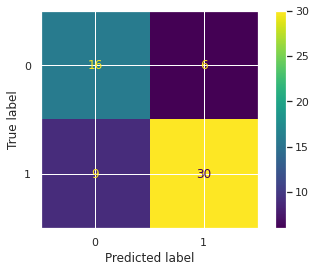

In [ ]:
y_model = y_predict

cm = confusion_matrix(y_test, y_model, labels= arbol.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= arbol.classes_)
disp.plot()

plt.show()


**Optimización de hiperparámetros**

Calcula la combinación de parámetros óptima (profundidad de árbol y criterio). Para ello
realiza ejecuciones con cada uno de los valores del criterio para los valores de profundidad
de árbol de 1 a 15.

In [ ]:
# instanciacion

criterions = ['gini','entropy']
porcentajes = []
max_depths = 0
max_criterion = ""

for criterion in criterions:
  for max_depth in range(1,16):
    arbol = DecisionTreeClassifier(criterion = criterion,max_depth=max_depth)

    # entrenamiento
    arbol.fit(x_train,y_train)

    # prediccion
    y_predict = arbol.predict(x_test)

    accuracy_score(y_test,y_predict)


    porcentajes.append(accuracy_score(y_test,y_predict))

    if max(porcentajes) == accuracy_score(y_test,y_predict):
      max_criterion = criterion
      max_depths = max_depth


    print(f"El porcentaje: {accuracy_score(y_test,y_predict)} con criterion como: {criterion} y con max_depth como: {max_depth}")

El porcentaje: 0.7704918032786885 con criterion como: gini y con max_depth como: 1
El porcentaje: 0.7213114754098361 con criterion como: gini y con max_depth como: 2
El porcentaje: 0.7540983606557377 con criterion como: gini y con max_depth como: 3
El porcentaje: 0.7540983606557377 con criterion como: gini y con max_depth como: 4
El porcentaje: 0.7213114754098361 con criterion como: gini y con max_depth como: 5
El porcentaje: 0.7704918032786885 con criterion como: gini y con max_depth como: 6
El porcentaje: 0.7377049180327869 con criterion como: gini y con max_depth como: 7
El porcentaje: 0.7213114754098361 con criterion como: gini y con max_depth como: 8
El porcentaje: 0.7213114754098361 con criterion como: gini y con max_depth como: 9
El porcentaje: 0.7704918032786885 con criterion como: gini y con max_depth como: 10
El porcentaje: 0.7704918032786885 con criterion como: gini y con max_depth como: 11
El porcentaje: 0.7377049180327869 con criterion como: gini y con max_depth como: 12
E

In [ ]:
print(f"El valor max de porcentaje es:{max(porcentajes)}, con criterion = {max_criterion}, y max_depth={max_depths}")

El valor max de porcentaje es:0.7868852459016393, con criterion = gini, y max_depth=14


Con ello obtendremos una medida de bondad del modelo (accuracy_score o mean_absolute_error)), como lo ejecutaremos 5 veces, calcularemos la media de esas 5 ejecuciones.

In [ ]:
kf = KFold(n_splits = 5)

# parámetros: modelo, los datos de entrenamiento separados (x, y)
# y el KFold con los splits
# devuelve la media de las ejecuciones
def validacion_cruzada_cl(model, x, y, kf):
  fold_accuracy = []
  for train_fold, test_fold in kf.split(x):
    # obtengo cada partición
    x_train_fold = x.iloc[train_fold]
    y_train_fold = y.iloc[train_fold]
    x_test_fold = x.iloc[test_fold]
    y_test_fold = y.iloc[test_fold]
    # entrenamiento
    model.fit(x_train_fold, y_train_fold)
    # predicción
    y_pred = model.predict(x_test_fold)
    # evaluación del modelo
    acc = accuracy_score(y_test_fold, y_pred)
    fold_accuracy.append(acc)
  media_score = sum(fold_accuracy)/len(fold_accuracy)
  return media_score

In [ ]:
kf = KFold(n_splits = 5)
validacion_cruzada_cl(arbol,x_train,y_train,kf)

0.7395408163265305

Finalmente los parámetros elegidos serán los que den mejor media de esas medidas anteriormente nombradas

In [ ]:
# instanciacion

arbol = DecisionTreeClassifier(criterion = max_criterion,max_depth=max_depths)

In [ ]:
# entrenamiento
arbol.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=14)

In [ ]:
# prediccion
y_predict = arbol.predict(x_test)

In [ ]:
y_predict

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [ ]:
tree.export_graphviz(arbol)

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="X[2] <= 0.5\\ngini = 0.499\\nsamples = 242\\nvalue = [116, 126]"] ;\n1 [label="X[11] <= 0.5\\ngini = 0.381\\nsamples = 117\\nvalue = [87, 30]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[7] <= 147.0\\ngini = 0.498\\nsamples = 51\\nvalue = [24, 27]"] ;\n1 -> 2 ;\n3 [label="X[3] <= 115.0\\ngini = 0.403\\nsamples = 25\\nvalue = [18, 7]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 4\\nvalue = [0, 4]"] ;\n3 -> 4 ;\n5 [label="X[10] <= 1.5\\ngini = 0.245\\nsamples = 21\\nvalue = [18, 3]"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 17\\nvalue = [17, 0]"] ;\n5 -> 6 ;\n7 [label="X[4] <= 249.0\\ngini = 0.375\\nsamples = 4\\nvalue = [1, 3]"] ;\n5 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 3]"] ;\n7 -> 8 ;\n9 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n7 -> 9 ;\n10 [label="X[12] <= 2.5\\ngini = 0.355\\nsamples = 26\\nvalue = [6, 20]"] 

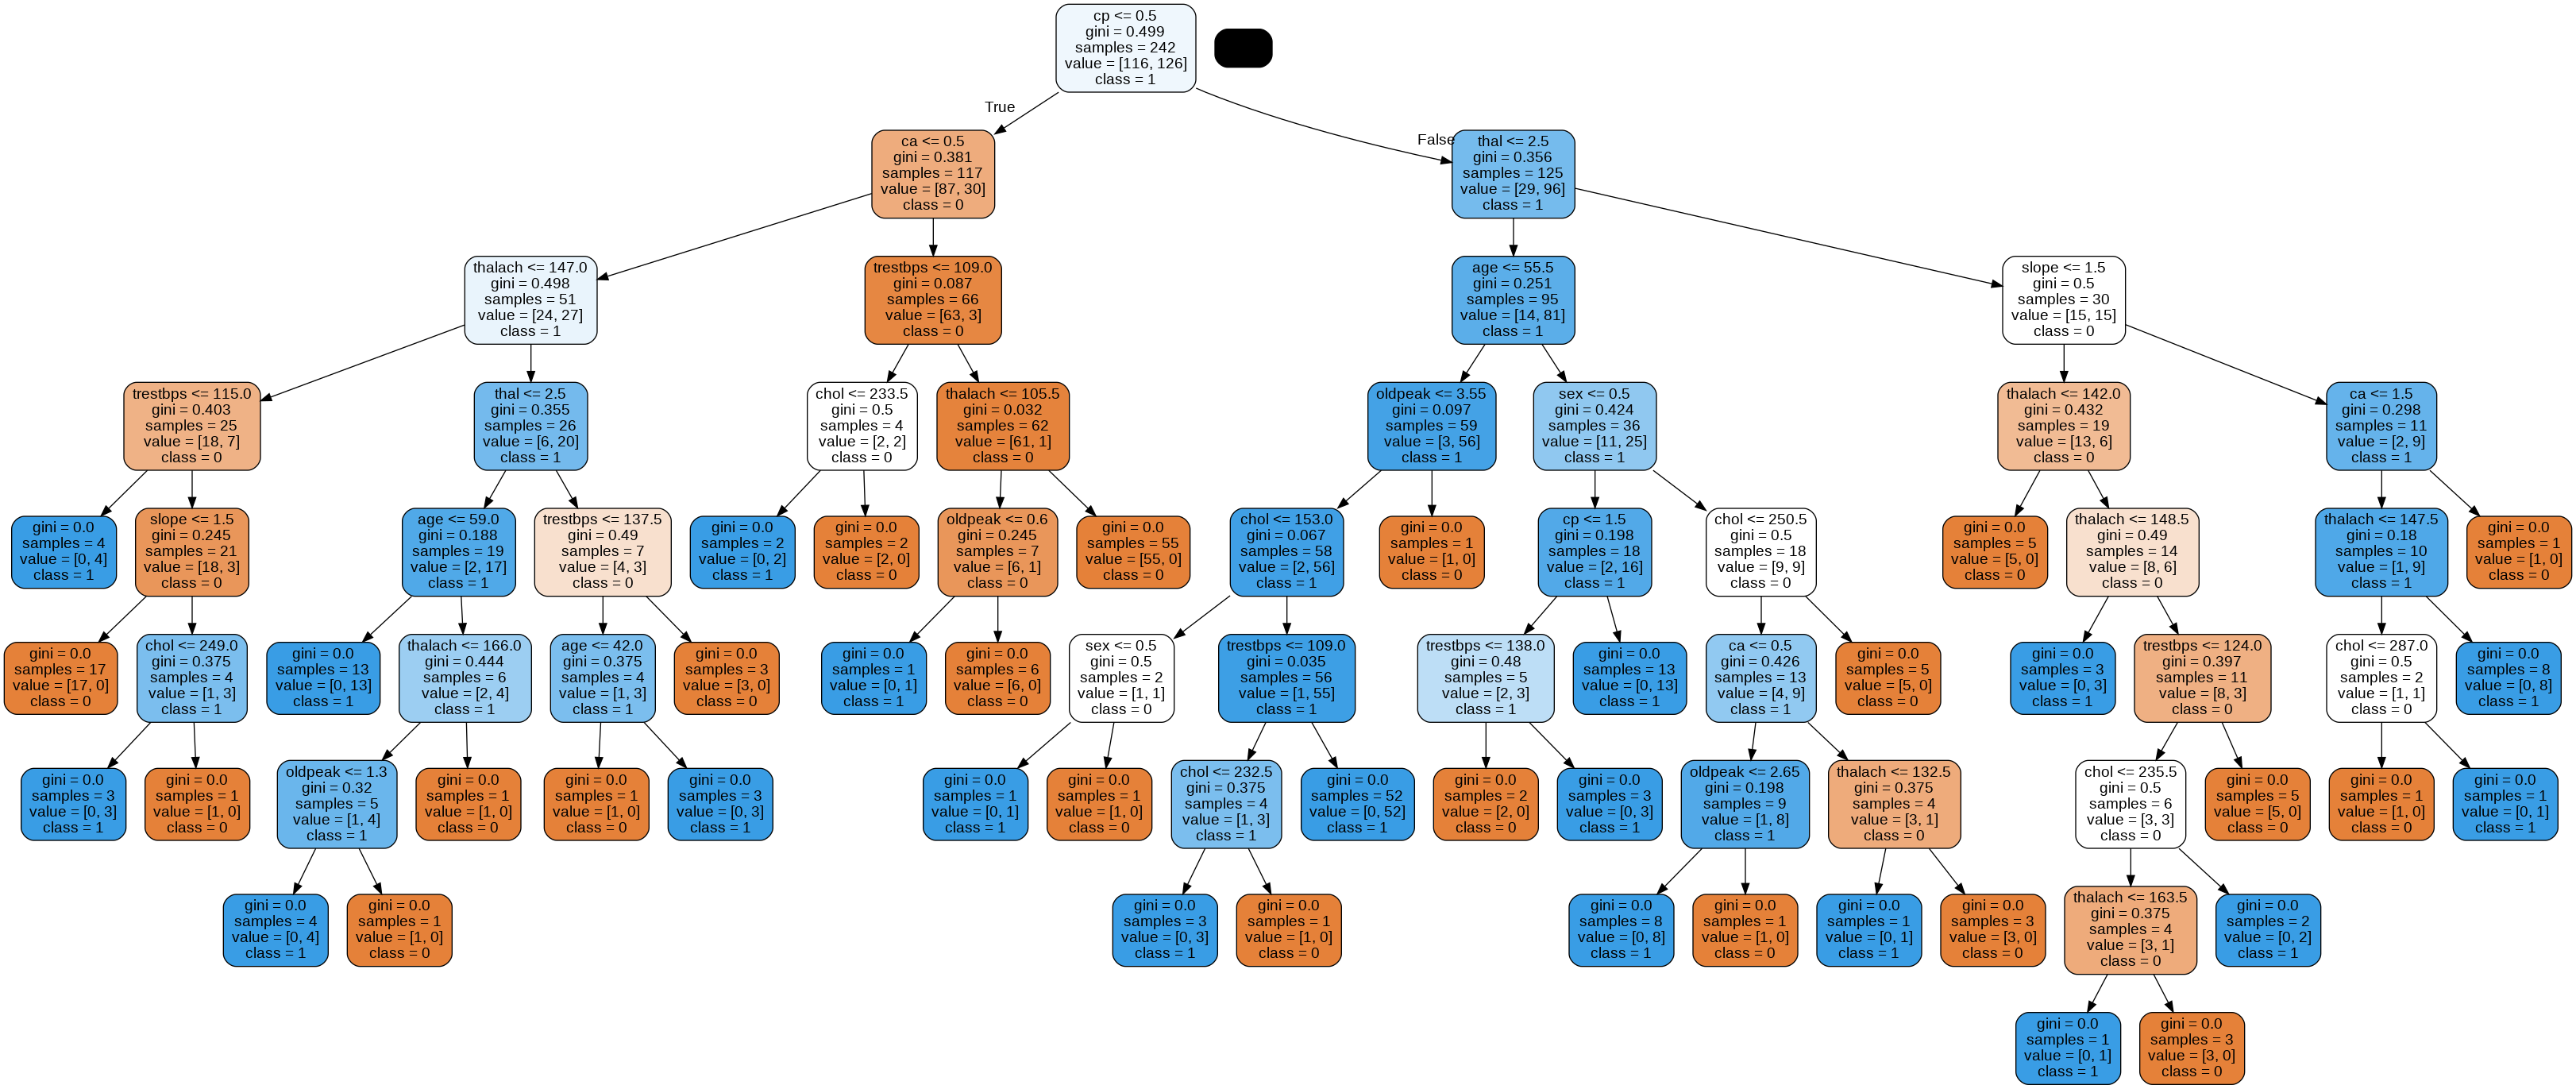

In [ ]:
dot_data = StringIO()

tree.export_graphviz(arbol, out_file = dot_data, class_names= arbol_classes, feature_names = x_train.columns,
                     rounded=True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

Mostrar el porcentaje de elementos correctamente clasificados

In [ ]:
accuracy_score(y_test,y_predict)

0.7540983606557377

Mostrar la predicción realizada (imprimir la variable con la predicción)

In [ ]:
y_predict

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

Representar gráficamente la clasificación obtenida (matriz de confusión)

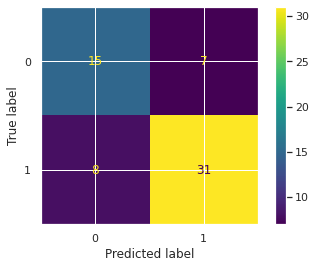

In [ ]:
y_model = y_predict

cm = confusion_matrix(y_test, y_model, labels= arbol.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels= arbol.classes_)
disp.plot()

plt.show()